# Problem Statement

"In today's digital age, streaming platforms like Netflix have become increasingly popular for entertainment consumption. The vast library of TV shows and movies on Netflix offers a unique opportunity for data analysis to uncover insights that can benefit both the platform and its users."
This project aims to analyze Netflix TV and Movies data to gain insights into user preferences, content trends and the impact of user ratings and Top  Actor, Top Director ,Genre.

In [84]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [85]:
# Load the Dataset

df=pd.read_csv('netflix_titles.csv')

In [86]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
df.shape

(8807, 12)

In [20]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# How many missing values are present in the entire dataset?


In [87]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [89]:
df.dropna(subset=['rating','duration','date_added'],axis=0,inplace=True)

### In the Column director,cast,country,date_added,rating,duration has missing Value.

# Filling missing Value

In [91]:
df['director'] = df['director'].fillna('No Data')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('No Data')

In [92]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Check the information of the dataframe(df).

In [24]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [94]:
df['date_added']=pd.to_datetime(df['date_added'])    # convert data type 

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [96]:
df.head(5)            # Top 5 Observation

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,Unknown,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [97]:
df.tail(5)             # last 5 observation

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No Data,Unknown,No Data,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


# 1) Type of Most Watched Shows  on Netflix

In [98]:
type_counts=df['type'].value_counts()
type_counts

Movie      6126
TV Show    2664
Name: type, dtype: int64

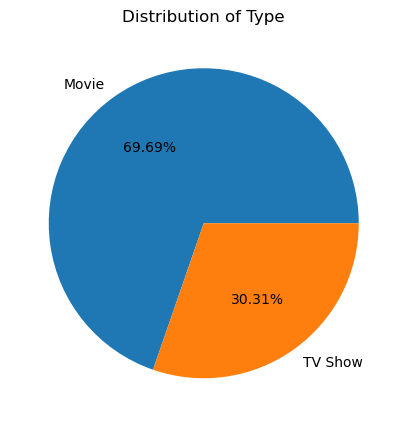

In [99]:
plt.figure(figsize=(5, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%.2f%%')
plt.title("Distribution of Type")
plt.show()

### Distribution of Movie has most watch shows as compared to TV Shows.

# 2) Top 10 countries with Most Contributions to Netflix

In [100]:
top_10_countries = df['country'].value_counts().head(10)

In [101]:
top_10_countries

United States     2809
India              972
No Data            829
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

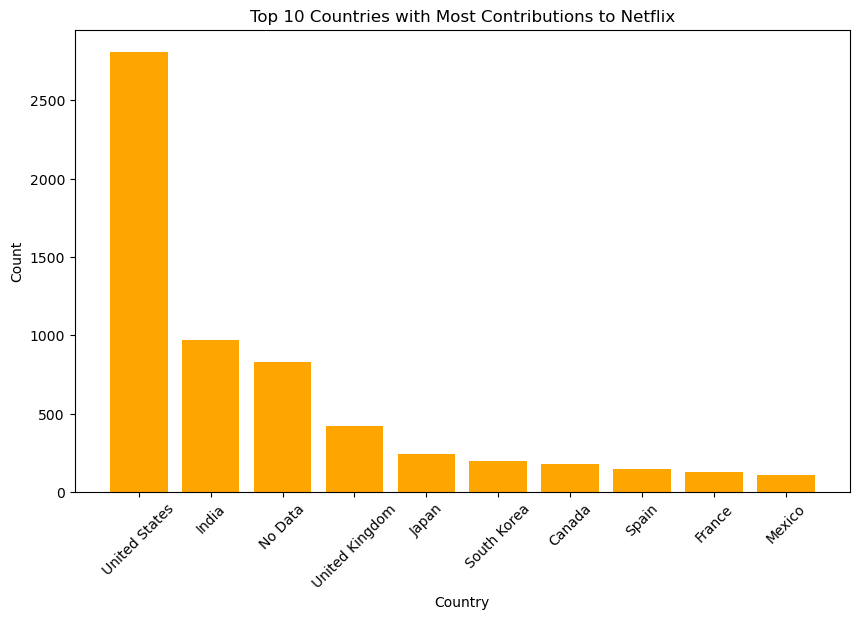

In [102]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries.index,top_10_countries.values, color='orange')
plt.title('Top 10 Countries with Most Contributions to Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Most number of Movies and TV shows are produced by United States Followed by India who has Produced the second most number of movies on netflix.

# 3) Top 10 Genre listed_in

In [103]:
top_10_listed_in=df.listed_in.value_counts().head(10)
top_10_listed_in

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

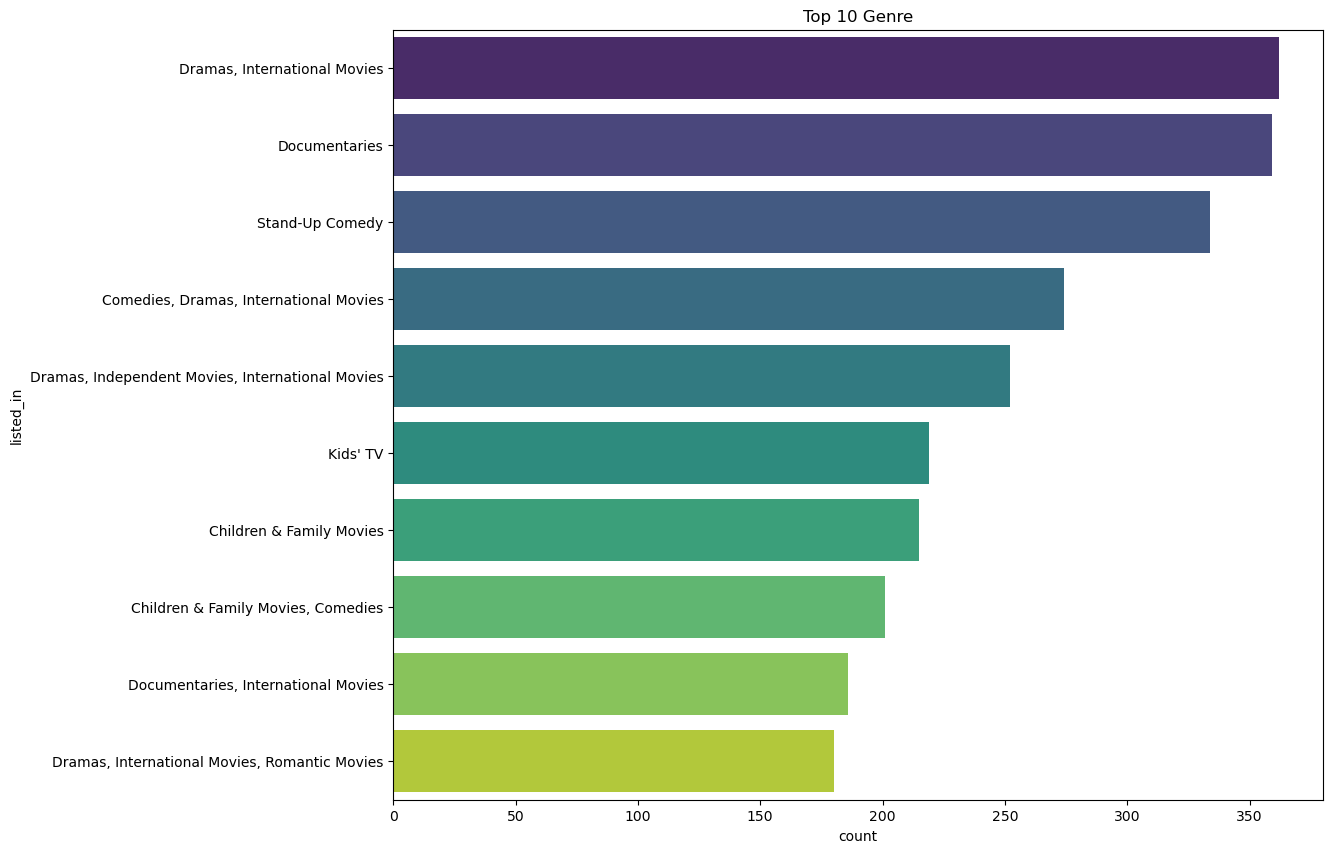

In [104]:
plt.figure(figsize=(12, 10))
sb.countplot(y='listed_in', data=df, order=top_10_listed_in.index, palette='viridis')
plt.title('Top 10 Genre')
plt.show()

### Dramas, International Movies top most Genre Listed_in.these are the most popular Genres on Netflix.

# 4) top_3_highest_rated Counts

In [105]:
top_3_highest_rated_Counts=df.rating.value_counts().head(3)
top_3_highest_rated_Counts

TV-MA    3205
TV-14    2157
TV-PG     861
Name: rating, dtype: int64

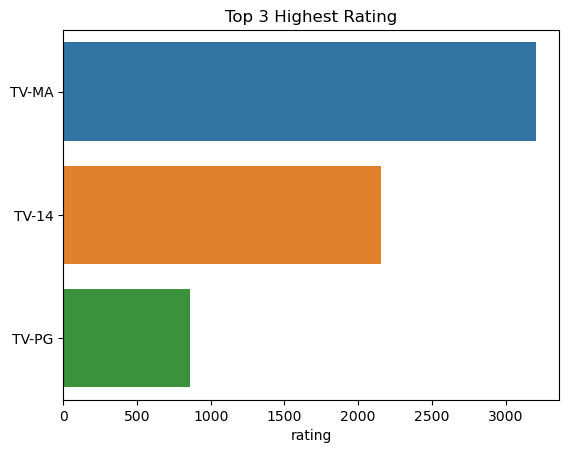

In [106]:
sb.barplot(x=top_3_highest_rated_Counts,y=top_3_highest_rated_Counts.index,data=df)
plt.title('Top 3 Highest Rating')
plt.show()



# highest count TV-MA is rating that shows that program intended for adults MA stands for mature audiences,
# children aged 17 and younger should not view these program.

# second largest is TV-14 program meant for children over 14 year age.it is generally not recommend to let children 
# to watch program without parental attendednces.


### highest count TV-MA is rating that shows that program intended for adults MA stands for mature audiences,children aged 17 and younger should not view these program.


### second largest is TV-14 program meant for children over 14 year age.it is generally not recommend to let children to watch program without parental attendednces.


# 5) Year wise Count

In [107]:
Year_wise_Count=df.release_year.value_counts().head(15)
Year_wise_Count

2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
2010     192
2011     185
2009     152
2008     135
2006      96
Name: release_year, dtype: int64

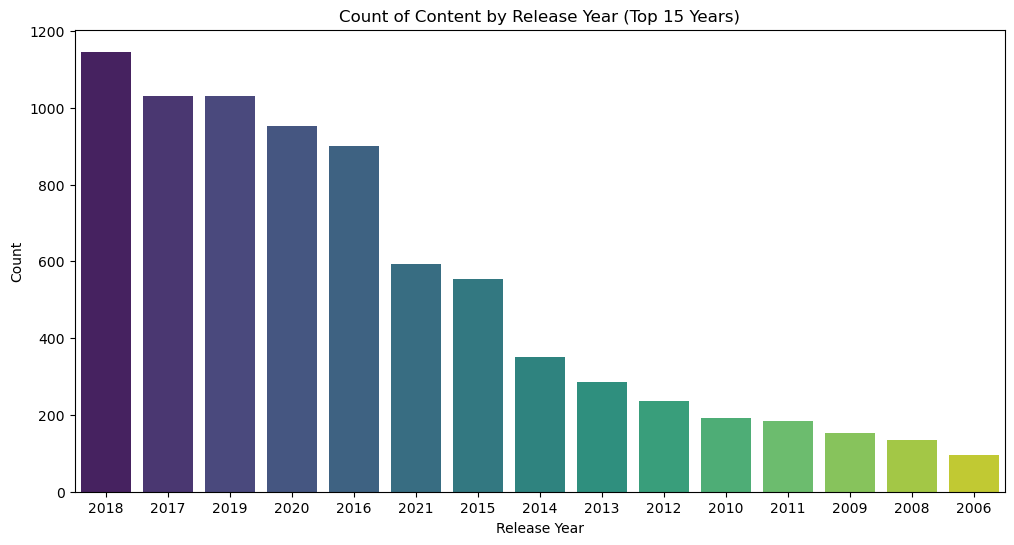

In [108]:
plt.figure(figsize=(12, 6))
sb.countplot(data=df, x='release_year', order=Year_wise_Count.index, palette='viridis')
plt.title('Count of Content by Release Year (Top 15 Years)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

### 2018 is the year in which Netflix released alot more content as compared to other years.


# 6) Top 10 Directors by Number of Titles

In [109]:
top_directors = df['director'].value_counts().head(10)
print("\nTop 10 Directors by Number of Titles:")
print(top_directors)


Top 10 Directors by Number of Titles:
No Data                   2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: director, dtype: int64


## Rajiv Chilaka is the top most director has maximum number of titles followed by Raúl Campos, Jan Suter .

# 7) Top 10 Actor/Actresses

In [110]:
top_actors = df['cast'].value_counts().head(10)
top_actors

Unknown                                                                                                                   825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
David Spade, London Hughes, Fortune Feimster                                                                                6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
Craig Sechler                                                                                                         

## David Attenborough is the top most actor.

# 8) Content from the United States

In [111]:
specific_country_US = df[(df['type'] == 'Movie') & (df['country'] == 'United States')]
specific_country_US

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,2021-09-16,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...
...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2019-11-20,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


# 9) Content from the India

In [112]:
specific_country_India = df[(df['type'] == 'TV Show') & (df['country'] == 'India')]
specific_country_India

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
39,s40,TV Show,Chhota Bheem,No Data,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
50,s51,TV Show,Dharmakshetra,No Data,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,No Data,Unknown,India,2021-09-15,2014,TV-G,1 Season,"Docuseries, International TV Shows",Explore the history and flavors of regional In...
69,s70,TV Show,Stories by Rabindranath Tagore,No Data,Unknown,India,2021-09-15,2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...
...,...,...,...,...,...,...,...,...,...,...,...,...
8173,s8174,TV Show,Thackeray,No Data,Unknown,India,2019-05-25,2019,TV-MA,1 Season,TV Shows,From controversial cartoonist to powerful Mumb...
8235,s8236,TV Show,The Calling,Bumpy,Unknown,India,2019-04-01,2018,TV-MA,1 Season,"International TV Shows, Reality TV",Food-crazed travel junkies journey across Indi...
8321,s8322,TV Show,The Golden Years with Javed Akhtar,No Data,Unknown,India,2017-06-01,2016,TV-G,1 Season,"Docuseries, International TV Shows","Writer, poet and lyricist Javed Akhtar hosts t..."
8349,s8350,TV Show,The House That Made Me,No Data,Vinay Pathak,India,2017-03-31,2015,TV-PG,3 Seasons,"International TV Shows, Reality TV","With host Vinay Pathak, Indian celebrities ret..."


# 10) Top 10 Titles by Rating

In [113]:
top_titles = df[['title', 'rating']].sort_values(by='rating', ascending=False).head(10)
top_titles

,title,rating
8790,You Don't Mess with the Zohan,UR
7988,Sex Doll,UR
7058,Immoral Tales,UR
7646,Oh No! It's an Alien Invasion,TV-Y7-FV
7317,Little Singham aur Kaal ka Mahajaal,TV-Y7-FV
7290,LEGO Ninjago: Masters of Spinjitzu: Day of the...,TV-Y7-FV
7513,Motu Patlu: King of Kings,TV-Y7-FV
6581,Dear Dracula,TV-Y7-FV
7292,Leo the Lion,TV-Y7-FV
269,Winx Club,TV-Y7


# 11) release year 2000 

In [114]:
movies_2000 = df[(df['type'] == 'Movie') & (df['release_year'] == 2000)]
movies_2000 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",No Data,2021-09-01,2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ..."
350,s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,2021-08-01,2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...
359,s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,2021-08-01,2000,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer..."
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany",2021-07-01,2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...
593,s594,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,2021-07-01,2000,PG,89 min,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the..."
779,s780,Movie,Battlefield Earth,Roger Christian,"John Travolta, Barry Pepper, Forest Whitaker, ...",United States,2021-06-02,2000,PG-13,118 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy","In the year 3000, an alien race known as the P..."
952,s953,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,2021-05-01,2000,R,99 min,"Action & Adventure, Comedies",An unhappily married dentist becomes mixed up ...
3472,s3473,Movie,Rugrats in Paris: The Movie,"Stig Bergqvist, Paul Demeyer","Elizabeth Daily, Tara Strong, Cheryl Chase, Ch...","Germany, United States",2019-10-01,2000,G,79 min,"Children & Family Movies, Comedies",The Rugrats take to the big screen and visit P...
4545,s4546,Movie,Monty Python: Before the Flying Circus,Will Yapp,"Graham Chapman, Eric Idle, Terry Jones, Michae...",United Kingdom,2018-10-02,2000,TV-MA,56 min,"Comedies, Documentaries",Discover how six seemingly ordinary but suprem...
4723,s4724,Movie,Fiza,Khalid Mohamed,"Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, ...",India,2018-08-02,2000,TV-14,163 min,"Dramas, International Movies, Music & Musicals",Fiza's brother disappears during Mumbai's horr...


In [115]:
movies_2000.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",No Data,2021-09-01,2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ..."
350,s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,2021-08-01,2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...
359,s360,Movie,The Original Kings of Comedy,Spike Lee,"Steve Harvey, D.L. Hughley, Cedric the Enterta...",United States,2021-08-01,2000,R,111 min,Stand-Up Comedy,"Comedians Steve Harvey, Cedric the Entertainer..."
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany",2021-07-01,2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...
593,s594,Movie,Snow Day,Chris Koch,"Chris Elliott, Mark Webber, Jean Smart, Schuyl...",United States,2021-07-01,2000,PG,89 min,"Children & Family Movies, Comedies","When a snow day shuts down the whole town, the..."


# 12) Show all the records where Category is movie and listed in Comedies in UK

In [116]:
df[(df['type'] == 'Movie') & (df['listed_in']=='Comedies') & (df['country'] == 'United Kingdom')]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3332,s3333,Movie,Christmas Survival,James Dearden,"Julian Ovenden, Gemma Whelan, Joely Richardson...",United Kingdom,2019-11-01,2018,TV-MA,101 min,Comedies,"With Christmas just around the corner, sisters..."
4544,s4545,Movie,"Monty Python Live (Mostly): One Down, Five to Go",Eric Idle,"John Cleese, Terry Gilliam, Eric Idle, Terry J...",United Kingdom,2018-10-02,2014,TV-MA,137 min,Comedies,"Live from London in a sold-out final show, sur..."
4547,s4548,Movie,Monty Python: Live at The Hollywood Bowl,"Terry Hughes, Ian MacNaughton","Graham Chapman, John Cleese, Terry Gilliam, Er...",United Kingdom,2018-10-02,1982,R,80 min,Comedies,Film clips and Terry Gilliam animations featur...
4554,s4555,Movie,Parrot Sketch Not Included: Twenty Years of Mo...,Ian MacNaughton,"Steve Martin, John Cleese, Graham Chapman, Ter...",United Kingdom,2018-10-02,1989,TV-14,72 min,Comedies,"Presented by Steve Martin, this anthology draw..."
6576,s6577,Movie,Dead in a Week (Or Your Money Back),Tom Edmunds,"Tom Wilkinson, Aneurin Barnard, Freya Mavor, M...",United Kingdom,2019-03-01,2018,TV-MA,90 min,Comedies,After several failed attempts at taking his ow...
6779,s6780,Movie,For Love or Money,Mark Murphy,"Robert Kazinsky, Samantha Barks, Ed Speleers, ...",United Kingdom,2019-08-16,2019,TV-MA,95 min,Comedies,When a goofy but likable millionaire discovers...
8201,s8202,Movie,The Bad Education Movie,Elliot Hegarty,"Jack Whitehall, Joanna Scanlan, Iain Glen, Eth...",United Kingdom,2018-12-15,2015,TV-MA,87 min,Comedies,Britain's most ineffective but caring teacher ...
8536,s8537,Movie,The Trip to Spain,Michael Winterbottom,"Steve Coogan, Rob Brydon, Marta Barrio, Claire...",United Kingdom,2017-12-12,2016,TV-MA,108 min,Comedies,Comedians Steve Coogan and Rob Brydon gorge on...


# 13) Movies got Tv-14 Rating in Canada

In [104]:
movies_tv_14_canada = df[(df['type'] == 'Movie') & (df['rating'] == 'TV-14') & (df['country'] == 'Canada')]
movies_tv_14_canada.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
157,s158,Movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,"September 1, 2021",2018,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...
1279,s1280,Movie,Made You Look: A True Story About Fake Art,Barry Avrich,No Data Available,Canada,"February 23, 2021",2020,TV-14,90 min,"Documentaries, International Movies",A woman walks into a New York gallery with a c...
2769,s2770,Movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,"March 27, 2020",2019,TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...
3424,s3425,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",2019,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...
5972,s5973,Movie,#cats_the_mewvie,Michael Margolis,No Data Available,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...


# 14) TV-Show got rating TV-14 after year 2018

In [117]:
df[(df['type'] == 'TV Show') & (df['rating'] == 'TV-14') & (df['release_year']>2018)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
20,s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,Unknown,No Data,2021-09-22,2021,TV-14,1 Season,"Crime TV Shows, Docuseries, International TV S...","In the late 1970s, an accused serial rapist cl..."
25,s26,TV Show,Love on the Spectrum,No Data,Brooke Satchwell,Australia,2021-09-21,2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
82,s83,TV Show,Lucifer,No Data,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,2021-09-10,2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas","Bored with being the Lord of Hell, the devil r..."
102,s103,TV Show,Countdown: Inspiration4 Mission to Space,Jason Hehir,Unknown,No Data,2021-09-06,2021,TV-14,1 Season,"Docuseries, Science & Nature TV","From training to launch to landing, this all-a..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4057,s4058,TV Show,Northern Rescue,No Data,"William Baldwin, Kathleen Robertson, Spencer M...",Canada,2019-03-01,2019,TV-14,1 Season,TV Dramas,"After the sudden death of his wife, search and..."
4132,s4133,TV Show,Romance is a bonus book,No Data,"Lee Jong-suk, Lee Na-young, Jung Eugene, Wi Ha...",South Korea,2019-02-03,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A gifted writer who's the youngest editor-in-c...
4844,s4845,TV Show,Unbreakable Kimmy Schmidt,No Data,"Ellie Kemper, Jane Krakowski, Tituss Burgess, ...",United States,2018-05-30,2019,TV-14,4 Seasons,TV Comedies,When a woman is rescued from a doomsday cult a...
6024,s6025,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,2019-07-30,2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...


# 15) Which Individual Country has Highest No. of TV Show & Movie?

In [118]:
df_tv_shows = df[(df['type'])=='TV Show']
df_tv_shows.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [119]:
df_tv_shows.country.value_counts().head(1)

United States    754
Name: country, dtype: int64

In [120]:
df_movie = df[(df['type'])=='Movie']
df_movie.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No Data,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [121]:
df_movie.country.value_counts().head(1)

United States    2055
Name: country, dtype: int64

# 16)  Sort the dataset by year ?

In [122]:
df.sort_values(by='release_year').head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,No Data,Unknown,No Data,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


In [123]:
df.sort_values(by='release_year',ascending=False).head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",No Data,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,Unknown,No Data,2021-06-02,2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...


# 17) Category is Movie type is Dramas 
#        OR
#      Category is TV-Show type is Kids TV

In [124]:
filtered_tv_shows = df[((df['type'] == 'TV Show') & (df['listed_in'] == "Kids' TV")) | ((df['type'] == 'Movie') & (df['listed_in'] == 'Dramas'))]
filtered_tv_shows.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
34,s35,TV Show,Tayo and Little Wizards,No Data,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",No Data,2021-09-17,2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...
39,s40,TV Show,Chhota Bheem,No Data,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ..."
65,s66,TV Show,Numberblocks,No Data,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,2021-09-15,2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ..."
89,s90,TV Show,Mighty Raju,No Data,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",No Data,2021-09-09,2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan..."
100,s101,TV Show,Tobot Galaxy Detectives,No Data,"Austin Abell, Travis Turner, Cole Howard, Anna...",No Data,2021-09-07,2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...


# 18)  movies and TV shows available in different countries

In [125]:
country_content_counts = df.groupby(['country', 'type']).size()
country_content_counts

country                                              type   
, France, Algeria                                    Movie       1
, South Korea                                        TV Show     1
Argentina                                            Movie      38
                                                     TV Show    18
Argentina, Brazil, France, Poland, Germany, Denmark  Movie       1
                                                                ..
Venezuela                                            Movie       1
Venezuela, Colombia                                  Movie       1
Vietnam                                              Movie       7
West Germany                                         Movie       1
Zimbabwe                                             Movie       1
Length: 849, dtype: int64

# 19) Group by release year and count the number of titles

In [126]:
content_growth = df.groupby('release_year').size()
content_growth

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1030
2018    1146
2019    1030
2020     953
2021     592
Length: 74, dtype: int64

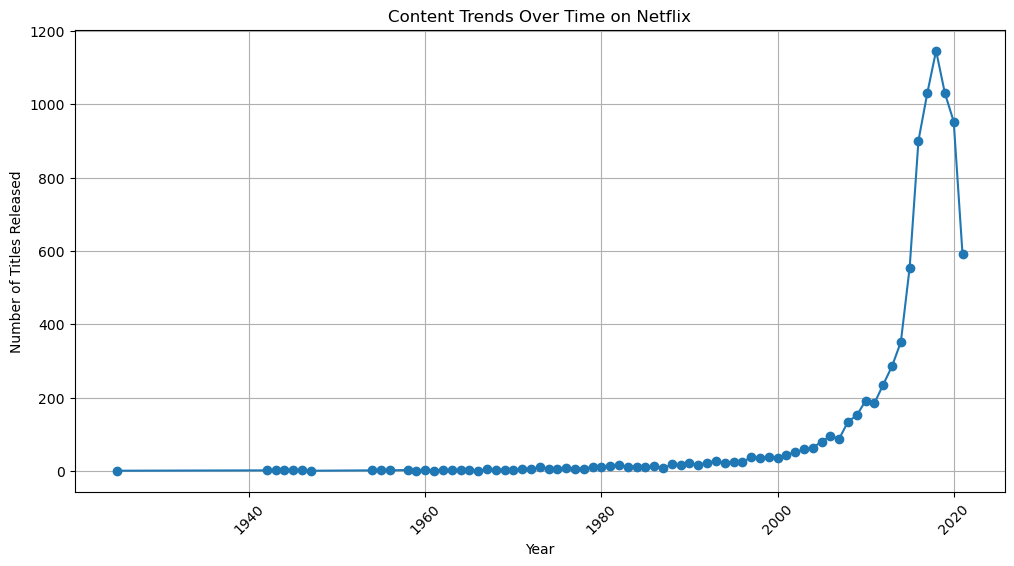

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(content_growth.index, content_growth.values, marker='o')
plt.title('Content Trends Over Time on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles Released')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## graph shows that the number of content trends has been increasing steadily over time, with a sharp increase in recent years.

In [130]:
df.to_csv('Netflix_Movies_TV_Analysis_New1',index=False)

# Conclusion

1)Netflix has more Movies than TV show.

2)Most number of Movies and TV shows are produced by United States Followed by India who has Produced the second most number of movies on netflix.

3)most of the content on netflix/Movies and Tv shows is for Audiences.

4)2018 is the year in which Netflix released alot more content as compared to other years.

5)International Movies and Dramas are the most popular Genres on Netflix.